In [1]:
import numpy as np
import pandas as pd

In [2]:
train = pd.read_csv('../emnist-letters-train.csv', header=None, nrows = 10000)
test = pd.read_csv('../emnist-letters-test.csv', header=None)
train.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,23,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,16,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,23,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
X_train = train.iloc[:, 1:].values/255.
y_train = train.iloc[:, 0].values
X_test = test.iloc[:, 1:].values/255.
y_test = test.iloc[:, 0].values

In [4]:
from matplotlib import pyplot as plt

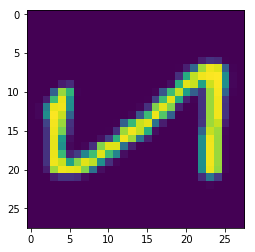

In [5]:
imageArr = X_train[14].reshape(28, -1)
plt.imshow(imageArr, interpolation='nearest')
plt.show()

In [6]:
import keras

Using TensorFlow backend.


In [7]:
img_size = 28
num_classes = 27

model = keras.models.Sequential()

model.add(keras.layers.Reshape((img_size,img_size,1), input_shape=(784,)))
model.add(keras.layers.Conv2D(filters=12, kernel_size=(5,5), strides=2, activation='relu', 
                              input_shape=(img_size,img_size,1)))
# model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(keras.layers.Dropout(.5))

model.add(keras.layers.Conv2D(filters=18, kernel_size=(3,3) , strides=2, activation='relu'))
# model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(keras.layers.Dropout(.5))

model.add(keras.layers.Conv2D(filters=24, kernel_size=(2,2), activation='relu'))
# model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

# model.add(keras.layers.Conv2D(filters=30, kernel_size=(3,3), activation='relu'))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(units=150, activation='relu'))
model.add(keras.layers.Dense(units=num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_1 (Reshape)          (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 12, 12, 12)        312       
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 12)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 5, 5, 18)          1962      
_________________________________________________________________
dropout_2 (Dropout)          (None, 5, 5, 18)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 24)          1752      
_________________________________________________________________
flatten_1 (Flatten)          (None, 384)              

In [8]:
#X_train_imgs = np.apply_along_axis((lambda x : x.reshape(28,-1)), 1, X_train)
#X_test_imgs = np.apply_along_axis((lambda x : x.reshape(28,-1)), 1, X_test)

In [9]:
X_train.shape

(10000, 784)

In [10]:
y_train_ohe = keras.utils.to_categorical(y_train, num_classes)
y_test_ohe = keras.utils.to_categorical(y_test, num_classes)

In [11]:
#model.fit(X_train, y_train_ohe, epochs = 100)

In [12]:
chunksize = 10 ** 4
def generate_arrays_from_file(path):
    while 1:
        for trainChunk in pd.read_csv(path, chunksize=chunksize):
            X_train = trainChunk.iloc[:, 1:].values/255.
            y_train = trainChunk.iloc[:, 0].values
            y_train_ohe = keras.utils.to_categorical(y_train, num_classes)
            yield(X_train, y_train_ohe)

In [17]:
trainSize = 90000
model.fit_generator(generate_arrays_from_file('../emnist-letters-train.csv'), steps_per_epoch=trainSize/chunksize, epochs=10)

Epoch 1/10
9/9 [==============================] - 14s 2s/step - loss: 0.8092 - accuracy: 0.7534
Epoch 2/10
9/9 [==============================] - 17s 2s/step - loss: 0.7836 - accuracy: 0.7602
Epoch 3/10
9/9 [==============================] - 17s 2s/step - loss: 0.7605 - accuracy: 0.7673
Epoch 4/10
9/9 [==============================] - 14s 2s/step - loss: 0.7476 - accuracy: 0.7708
Epoch 5/10
9/9 [==============================] - 14s 2s/step - loss: 0.7272 - accuracy: 0.7754
Epoch 6/10
9/9 [==============================] - 15s 2s/step - loss: 0.7098 - accuracy: 0.7809
Epoch 7/10
9/9 [==============================] - 14s 2s/step - loss: 0.6885 - accuracy: 0.7869
Epoch 8/10
9/9 [==============================] - 14s 2s/step - loss: 0.6790 - accuracy: 0.7900
Epoch 9/10
9/9 [==============================] - 14s 2s/step - loss: 0.6647 - accuracy: 0.7927
Epoch 10/10
9/9 [==============================] - 14s 2s/step - loss: 0.6507 - accuracy: 0.7981


In [33]:
np.random.shuffle(X_test)
results = model.predict(X_test)
pr = np.apply_along_axis((lambda x : x.argmax()), 1, results)

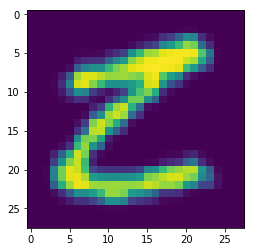

n


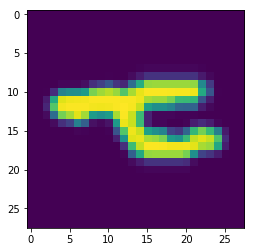

h


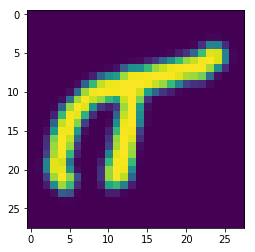

p


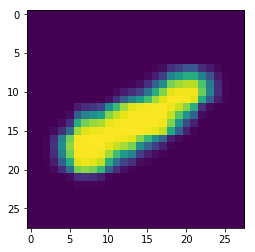

i


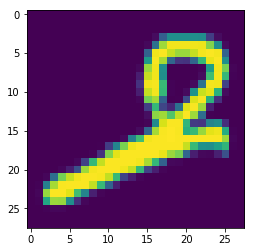

d


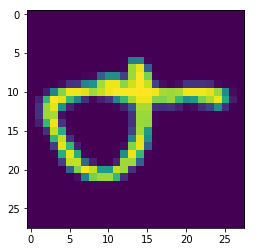

p


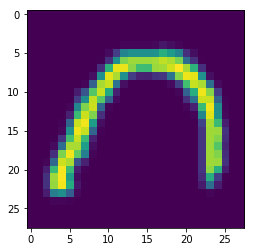

c


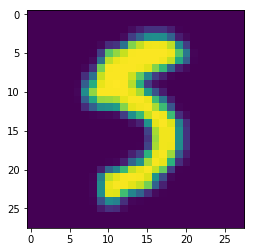

n


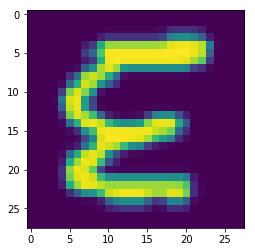

m


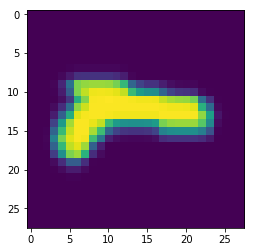

i


In [36]:
for i in range(0,10):
    imageArr = X_test[i].reshape(28, -1)
    plt.imshow(imageArr, interpolation='nearest')
    plt.show()
    print(chr(ord('a') + pr[i] - 1))